In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [199]:
data = pd.read_csv('/content/drive/MyDrive/Sem4/ethbtc-1d.csv')

In [200]:
data.head()

,timestamp,high,low,open,close,volume
0,1514764800000,231.19,212.74,223.69,222.61,20221.25300
1,1514851200000,256.49,222.62,222.62,247.33,63293.12934
2,1514937600000,253.40,233.56,247.33,238.77,71369.27484
3,1515024000000,240.00,219.38,238.89,233.00,78182.30493
4,1515110400000,250.99,230.00,233.04,240.54,65010.14465


In [201]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data = min_max_scaler.fit_transform(data.drop('timestamp',axis = 1))

In [202]:
def modify_data(X,m):
    list1 = []
    list2 = []
    list3 = []
    list4 = []
    for i in range(0,m - 25 - 1):
      if i >500 and i<625:
        temp = (X[i:i+25,[0,1,2,4]])
        list4.append(X[i+25][3])
        list3.append(temp)
      else:
        temp = (X[i:i+25,[0,1,2,4]])
        list2.append(X[i+25][3])
        list1.append(temp)

    return list1, list2, list3, list4

In [203]:
X, Y, X_test, Y_test = modify_data(data, 1183)

In [204]:
prices = np.array(X)

In [205]:
prices_test = np.array(X_test)

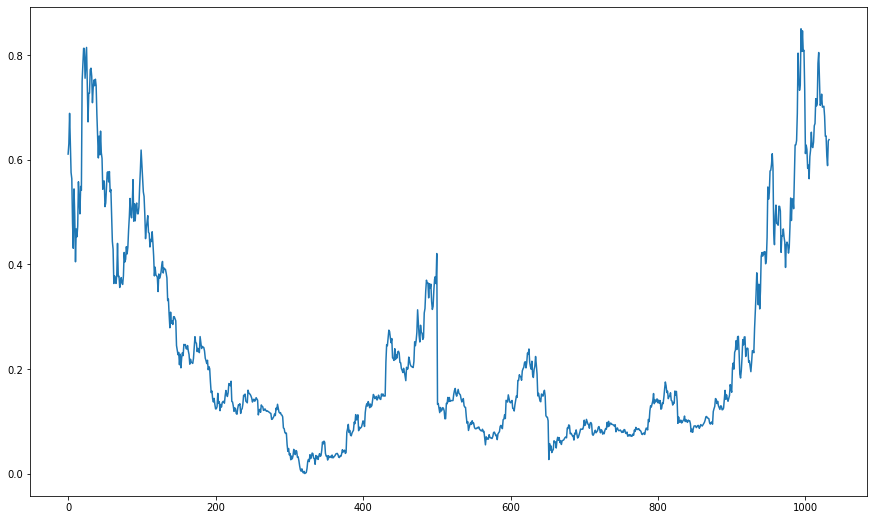

In [206]:
plt.figure(figsize = (15,9))
plt.plot(Y)

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, LeakyReLU, Dropout

In [208]:
num_units = 64
learning_rate = 0.001
activation_function = 'relu'
adam = Adam(lr=learning_rate)
loss_function = 'mae'
batch_size = 5
num_epochs = 50

# Initialize the RNN
model = Sequential()
model.add(LSTM(units = 32, activation=activation_function,return_sequences=True, input_shape=(None,4)))
model.add(LSTM(units = 32, activation=activation_function))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
model.add(Dense(units = 64))
model.add(Dropout(0.1))
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer=adam, loss=loss_function)

In [209]:
history = model.fit(
    prices,
    np.array(Y),
    validation_split=0.1,
    batch_size=5,
    epochs=50,
    shuffle=False
)

Epoch 1/50
186/186 [==============================] - 15s 69ms/step - loss: 0.1223 - val_loss: 0.2154
Epoch 2/50
186/186 [==============================] - 13s 67ms/step - loss: 0.0990 - val_loss: 0.2194
Epoch 3/50
186/186 [==============================] - 12s 67ms/step - loss: 0.0939 - val_loss: 0.1962
Epoch 4/50
186/186 [==============================] - 13s 68ms/step - loss: 0.0913 - val_loss: 0.1308
Epoch 5/50
186/186 [==============================] - 13s 68ms/step - loss: 0.0814 - val_loss: 0.1262
Epoch 6/50
186/186 [==============================] - 13s 68ms/step - loss: 0.0756 - val_loss: 0.1081
Epoch 7/50
186/186 [==============================] - 13s 67ms/step - loss: 0.0684 - val_loss: 0.1029
Epoch 8/50
186/186 [==============================] - 13s 68ms/step - loss: 0.0719 - val_loss: 0.1461
Epoch 9/50
186/186 [==============================] - 13s 69ms/step - loss: 0.0746 - val_loss: 0.1136
Epoch 10/50
186/186 [==============================] - 12s 67ms/step - loss: 0.063

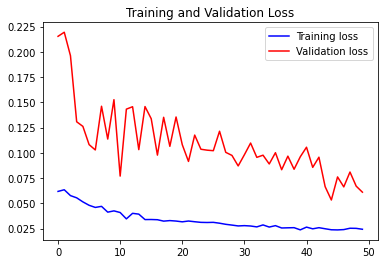

In [210]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

In [213]:
original = pd.DataFrame(np.array(Y_test))
predictions = pd.DataFrame(model.predict(prices_test))

[]

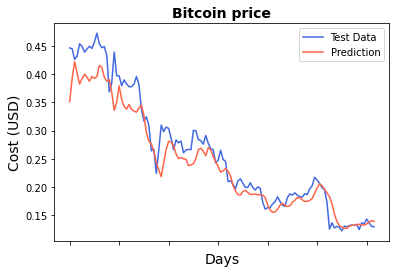

In [214]:
ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color='tomato')
ax.set_title('Bitcoin price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

In [196]:
model.save('/content/drive/MyDrive/Sem4/ethbtc')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sem4/ethbtc/assets


In [112]:
fd# new_model = tf.keras.models.load_model('/content/drive/MyDrive/Sem4/btcusdt')


In [113]:
predictions_new = pd.DataFrame(new_model.predict(prices))

[]

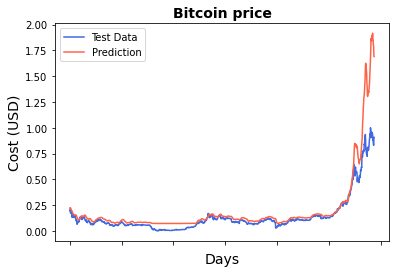

In [114]:
ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions_new.index, y=predictions_new[0], label="Prediction", color='tomato')
ax.set_title('Bitcoin price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)